In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [8]:
df = sns.load_dataset("titanic")
df.head()

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)>

In [9]:
import ssl
import seaborn as sns

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

# Load the Titanic dataset
df = sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
df2 = df[['survived', 'pclass', 'age', 'parch']]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [12]:
df3 = df2.fillna(df2.mean())

In [14]:
df3.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [15]:
x = df3.drop("survived", axis = 1)
y = df3["survived"]
print("x shape", x.shape)
print("y shape", y.shape)

x shape (891, 3)
y shape (891,)


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=51)
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (712, 3)
y_train shape (712,)
x_test shape (179, 3)
y_test shape (179,)


In [18]:
sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

In [19]:
sc.mean_

array([ 2.30617978, 29.55409121,  0.39185393])

In [20]:
sc.scale_

array([ 0.84405789, 12.99162985,  0.79647463])

In [21]:
x_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


In [25]:
x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)

/Users/admin/Desktop/Ml/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/admin/Desktop/Ml/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [26]:
x_train_sc

array([[-1.75837972, -2.30776312, -1.1096893 ],
       [-1.75837972, -2.12113234, -1.1096893 ],
       [-1.75837972, -2.38478535, -1.1096893 ],
       ...,
       [-1.75837972, -2.16556824,  3.61939826],
       [-1.75837972, -2.27399706,  0.46667322],
       [-1.75837972, -2.28110158, -1.1096893 ]])

In [27]:
x_train_sc = pd.DataFrame(x_train_sc, columns = ["pclass", "age", "parch"])
x_test_sc = pd.DataFrame(x_test_sc, columns = ["pclass", "age", "parch"])

In [28]:
x_train_sc.head()

,pclass,age,parch
0,-1.75838,-2.307763,-1.109689
1,-1.75838,-2.121132,-1.109689
2,-1.75838,-2.384785,-1.109689
3,-1.75838,-2.343312,-1.109689
4,-1.75838,-2.273997,2.043036


In [30]:
x_train_sc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,-2.73,-2.27,-0.49
std,1.19,0.08,1.26
min,-4.57,-2.45,-1.11
25%,-3.51,-2.32,-1.11
50%,-1.76,-2.27,-1.11
75%,-1.76,-2.24,-1.11
max,-1.76,-2.03,6.77


In [31]:
mmc = MinMaxScaler()
mmc.fit(x_train)

MinMaxScaler()

In [32]:
x_train_mmc = sc.transform(x_train)
x_test_mmc = sc.transform(x_test)

/Users/admin/Desktop/Ml/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/admin/Desktop/Ml/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
x_train_mmc

array([[-1.75837972, -2.30776312, -1.1096893 ],
       [-1.75837972, -2.12113234, -1.1096893 ],
       [-1.75837972, -2.38478535, -1.1096893 ],
       ...,
       [-1.75837972, -2.16556824,  3.61939826],
       [-1.75837972, -2.27399706,  0.46667322],
       [-1.75837972, -2.28110158, -1.1096893 ]])

In [34]:
x_train_mmc = pd.DataFrame(x_train_mmc, columns = ["pclass", "age", "parch"])
x_test_mmc = pd.DataFrame(x_test_mmc, columns = ["pclass", "age", "parch"])

In [36]:
x_train_mmc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,-2.73,-2.27,-0.49
std,1.19,0.08,1.26
min,-4.57,-2.45,-1.11
25%,-3.51,-2.32,-1.11
50%,-1.76,-2.27,-1.11
75%,-1.76,-2.24,-1.11
max,-1.76,-2.03,6.77


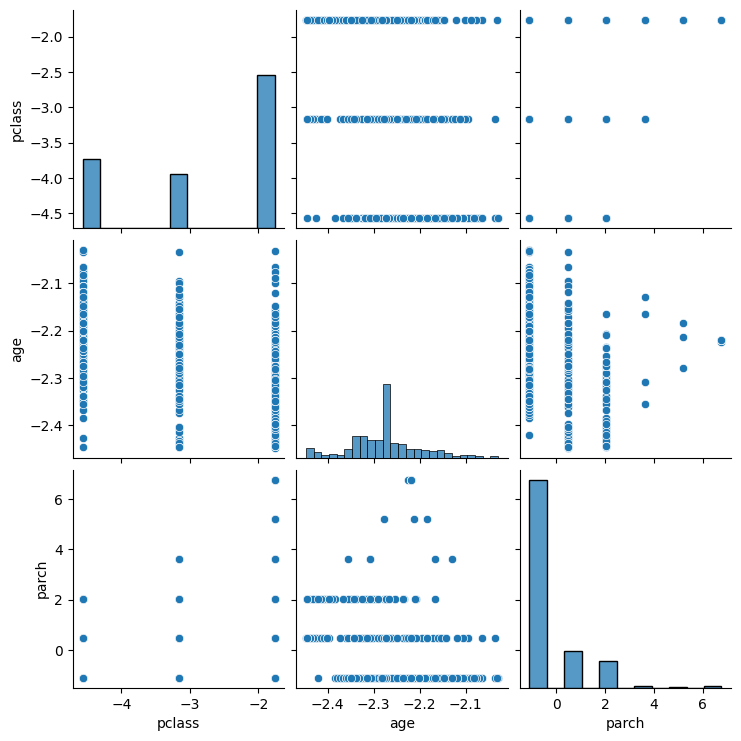

In [38]:
sns.pairplot(x_train_sc)

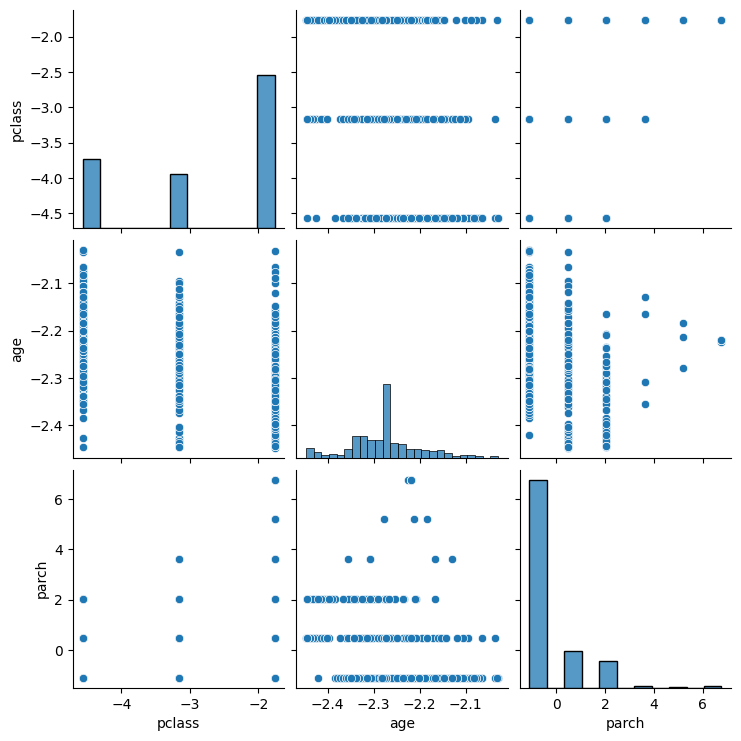

In [39]:
sns.pairplot(x_train_mmc)